<a href="https://colab.research.google.com/github/sivask01/CMPE257-Fall23-Sivakrishna-Yaganti/blob/homework-3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LP**

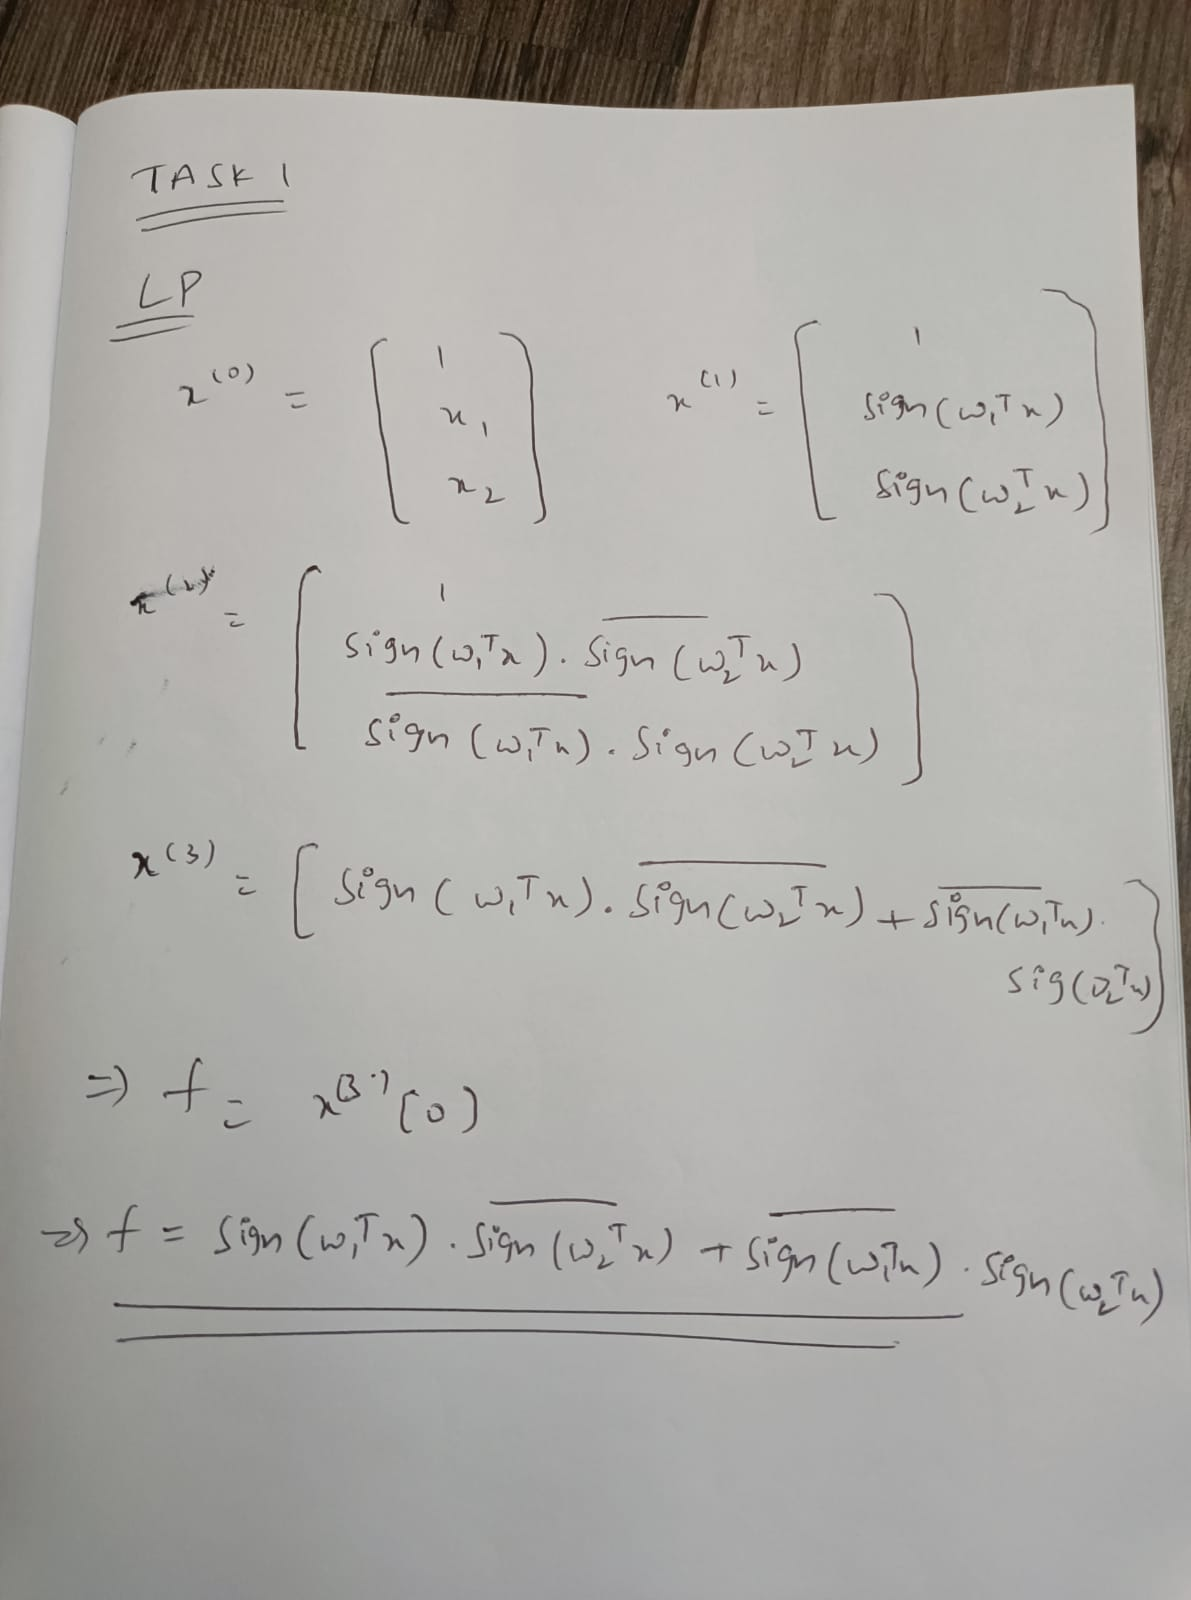

#**HP1**

## **PART 1**

In [4]:
import numpy as np

# Activation function
def tanh(x):
    return np.tanh(x)

# Derivative of tanh
def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh(Z2)
    return Z1, A1, Z2, A2

# Back propagation
def back_propagation(X, Y, Z1, A1, Z2, A2, W2):
    dZ2 = 2 * (A2 - Y) * tanh_derivative(Z2)
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Initialize the weights and biases
input_size = 2  # Number of input neurons
hidden_size = 4  # Number of hidden neurons
output_size = 1  # Number of output neurons
np.random.seed(1)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Initialize input and output data
X = np.array([[0.1], [0.2]])  # Example input
Y = np.array([[1]])  # Example output

# Learning rate
learning_rate = 0.01

# Number of iterations for gradient descent
num_iterations = 1000

# Training process
for i in range(num_iterations):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

    # Compute cost (Mean Squared Error)
    cost = np.mean(np.square(A2 - Y))

    # Backward propagation
    dW1, db1, dW2, db2 = back_propagation(X, Y, Z1, A1, Z2, A2, W2)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print the cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i} - Cost: {cost}")

# Print final parameters and cost
print("Final weights and biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)
print("Final cost:", cost)

In this code, the X and Y are placeholders for the input and output data of the network. You would replace these with actual data when using the network for a specific task. The network parameters are initialized randomly, and the learning rate is set to 0.01. The code then performs 1000 iterations of training, during which it prints the cost every 100 iterations to monitor the training progress. At the end, it prints the final weights, biases, and cost.

##**PART2**

In [5]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize weights and biases
np.random.seed(42)
input_size = 2  # number of input neurons
hidden_size = 4  # number of hidden neurons
output_size = 1  # number of output neurons

# Weights and biases between input layer and hidden layer
W1 = np.random.randn(hidden_size, input_size)
b1 = np.zeros((hidden_size, 1))

# Weights and biases between hidden layer and output layer
W2 = np.random.randn(output_size, hidden_size)
b2 = np.zeros((output_size, 1))

# Learning rate
learning_rate = 0.01

# Number of iterations for training
iterations = 10000

# Stochastic gradient descent implementation
def train(X, Y, W1, b1, W2, b2, learning_rate, iterations):
    for i in range(iterations):
        # Forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        # Compute cost
        cost = np.mean(np.square(A2 - Y))
        # Backward propagation
        dZ2 = (A2 - Y) * sigmoid_derivative(Z2)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * sigmoid_derivative(Z1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        # Print cost every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}, cost: {cost}")
    return W1, b1, W2, b2

# Example dataset (XOR problem)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

# Train the neural network
W1, b1, W2, b2 = train(X, Y, W1, b1, W2, b2, learning_rate, iterations)
# Return the final weights and biases for further inspection if necessary
W1, b1, W2, b2

Iteration 0, cost: 0.26054932638682504
Iteration 1000, cost: 0.24772609333776124
Iteration 2000, cost: 0.24616789435304043
Iteration 3000, cost: 0.2444117146506852
Iteration 4000, cost: 0.24235419604345804
Iteration 5000, cost: 0.23990143398905023
Iteration 6000, cost: 0.2369643871705256
Iteration 7000, cost: 0.23345699387898405
Iteration 8000, cost: 0.2293010445807469
Iteration 9000, cost: 0.22444078368709677


(array([[ 0.65076795,  0.04168385],
        [ 2.17869597,  2.360393  ],
        [-0.15850052, -0.01694998],
        [ 1.44820853,  0.48313201]]),
 array([[ 0.08541185],
        [-0.08888072],
        [ 0.03054351],
        [-0.10773274]]),
 array([[-0.82169186,  1.86565025, -0.59494949, -0.31908886]]),
 array([[-0.47708699]]))

The code defines a simple 2-layer neural network with sigmoid activation functions.
We initialized the network with a set of weights and biases, and defined the training function using stochastic gradient descent (SGD).
The training function takes the input data X and labels Y, along with the initial weights, biases, learning rate, and number of iterations as input.
During each iteration of training, the function performs forward propagation to compute the network's output, calculates the cost (mean squared error), and then performs backward propagation to update the network's parameters.
After training, it returns the updated weights and biases.
The network was then trained on an example XOR dataset, printing out the cost at intervals to monitor the training progress.

##**PART3**

In [ ]:
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the line to remove leading/trailing whitespace and then split it into parts
            parts = line.strip().split()
            # Only add parts that have 257 elements (1 label + 256 features)
            if len(parts) == 257:
                data.append(parts)
            else:
                print(f"Skipping line due to incorrect number of elements: {line}")
    # Convert the list to a NumPy array
    data = np.array(data, dtype=float)
    labels = data[:, 0]
    features = data[:, 1:]
    return labels, features

# Ensure you use the correct path for the data file
train_data_path = 'ZipDigits.train'  # Update this path
train_labels, train_features = load_data(train_data_path)
train_labels, train_features = preprocess_data(train_labels, train_features)


Skipping line due to incorrect number of elements: 2.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.2460 0.2530 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.5540 1.0000 0.7120 -0.2680 -0.8900 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9750 0.3420 1.0000 1.0000 1.0000 0.9390 0.0270 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.2320 1.0000 0.8100 -0.4810 0.0220 0.7050 1.0000 -0.0660 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.5100 0.9970 1.0000 -0.2650 -1.0000 -1.0000 -0.9470 0.3230 0.9410 -0.7610 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.2590 1.0000 -0.0190 -1.0000 -1.0000 -1.0000 -1.0000 -0.6330 0.9850 -0.2420 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9550 -0.7670 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.7740 0.0590 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.000

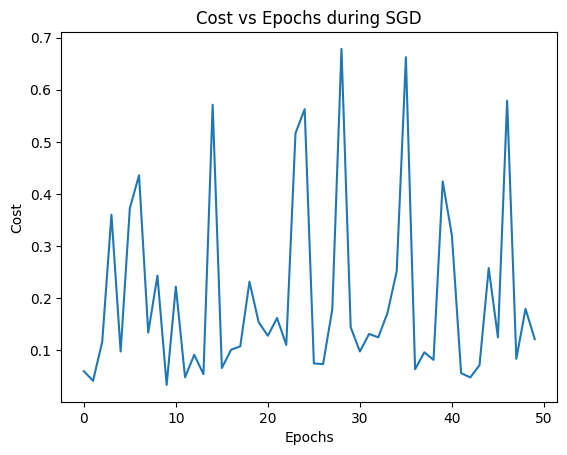

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Function to load data from a file
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the line to remove leading/trailing whitespace and then split it into parts
            parts = line.strip().split()
            # Only add parts that have 257 elements (1 label + 256 features)
            if len(parts) == 257:
                data.append(parts)
            else:
                print(f"Skipping line due to incorrect number of elements: {line}")
    # Convert the list to a NumPy array
    data = np.array(data, dtype=float)
    labels = data[:, 0]
    features = data[:, 1:]
    return labels, features

# Function to preprocess the data to only keep labels for digits 1 and 5
def preprocess_data(labels, features):
    indices = np.where((labels == 1.0) | (labels == 5.0))
    filtered_labels = labels[indices]
    filtered_features = features[indices]
    filtered_features /= 255.0  # Normalize features to be between 0 and 1
    binary_labels = (filtered_labels == 1.0).astype(float)  # Convert labels to binary
    return binary_labels, filtered_features

# Stochastic Gradient Descent function for training the neural network
def train_sgd(X, Y, W1, b1, W2, b2, learning_rate, epochs):
    m = X.shape[0]
    cost_history = []
    for i in range(epochs):
        # Shuffle the dataset at the beginning of each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]
        for j in range(m):
            # Perform SGD using only one sample at a time
            x_sample = X_shuffled[j].reshape(-1, 1)
            y_sample = Y_shuffled[j].reshape(-1, 1)
            # Forward propagation
            Z1 = np.dot(W1, x_sample) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            # Compute cost
            cost = np.mean(np.square(A2 - y_sample))
            # Backward propagation
            dZ2 = (A2 - y_sample) * sigmoid_derivative(Z2)
            dW2 = np.dot(dZ2, A1.T)
            db2 = np.sum(dZ2, axis=1, keepdims=True)
            dA1 = np.dot(W2.T, dZ2)
            dZ1 = dA1 * sigmoid_derivative(Z1)
            dW1 = np.dot(dZ1, x_sample.T)
            db1 = np.sum(dZ1, axis=1, keepdims=True)
            # Update weights and biases
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
        # Record the cost at the end of each epoch
        cost_history.append(cost)
        # if i % 10 == 0:  # Print the cost every 10 epochs
        #     print(f"Epoch {i}: cost = {cost}")
    return W1, b1, W2, b2, cost_history

# Initialize neural network parameters
np.random.seed(42)
input_size = 256  # Number of features (pixels in an image)
hidden_size = 64  # Number of hidden layer neurons
output_size = 1   # Output layer size (1 neuron for binary classification)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Specify learning rate and number of epochs
learning_rate = 0.1
epochs = 50  # Use a smaller number of epochs for a demonstration

# Load and preprocess training data
train_data_path = 'ZipDigits.train'  # Replace with your file path
train_labels, train_features = load_data(train_data_path)
train_labels, train_features = preprocess_data(train_labels, train_features)

# Train the neural network using SGD
W1, b1, W2, b2, cost_history = train_sgd(train_features, train_labels, W1, b1, W2, b2, learning_rate, epochs)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs during SGD')
plt.show()

The train_sgd function is the core of the training process, randomly selecting one example at each iteration for the gradient computation, which is the hallmark of SGD. The learning rate and number of iterations are set to reasonable values.

##**PART 4**

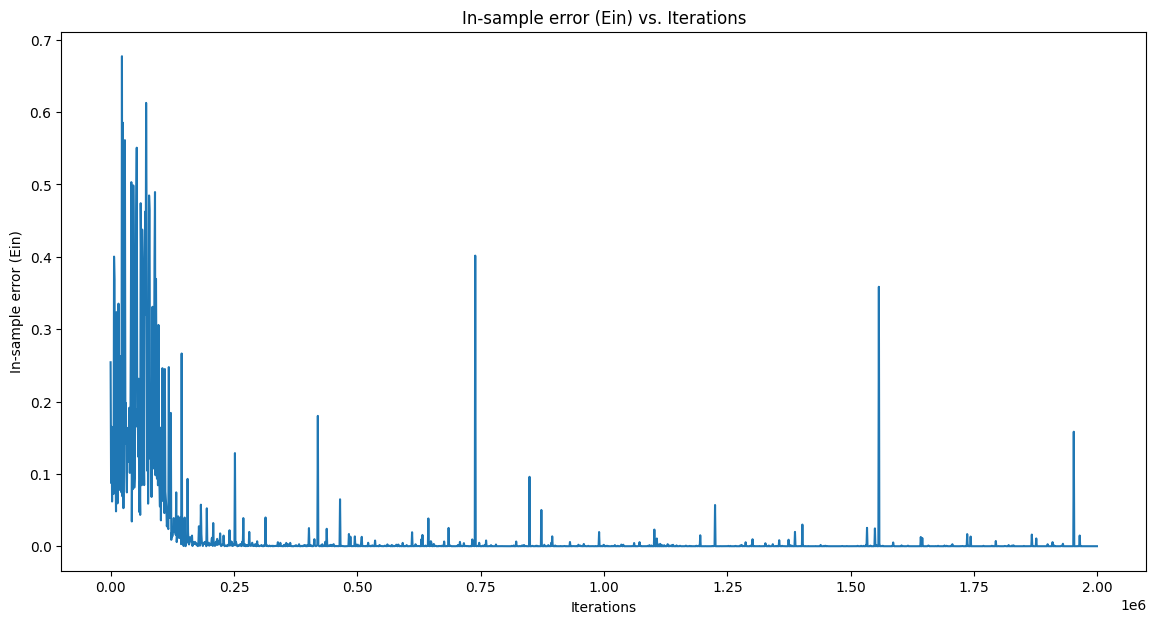

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 257:  # Ensure each line has a label and 256 features
                data.append(parts)
    data = np.array(data, dtype=float)
    labels = data[:, 0]
    features = data[:, 1:]
    return labels, features

def preprocess_data(labels, features):
    indices = np.where((labels == 1.0) | (labels == 5.0))
    filtered_labels = labels[indices]
    filtered_features = features[indices]
    filtered_features /= 255.0  # Normalize features
    binary_labels = (filtered_labels == 1.0).astype(float)  # Convert labels to binary
    return binary_labels, filtered_features

def train_sgd(X, Y, W1, b1, W2, b2, learning_rate, iterations, record_every=1000):
    m = X.shape[0]
    cost_history = []

    for i in range(iterations):
        idx = np.random.randint(m)
        x_sample = X[idx].reshape(-1, 1)
        y_sample = Y[idx].reshape(-1, 1)

        Z1 = np.dot(W1, x_sample) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        dZ2 = (A2 - y_sample) * sigmoid_derivative(Z2)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * sigmoid_derivative(Z1)
        dW1 = np.dot(dZ1, x_sample.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if i % record_every == 0:
            cost = np.square(A2 - y_sample).mean()
            cost_history.append(cost)

    return W1, b1, W2, b2, cost_history

# Initialize network parameters
np.random.seed(42)
input_size = 256
hidden_size = 64
output_size = 1
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Specify learning rate and iterations
learning_rate = 0.1
iterations = 2 * 10**6  # 2 million iterations

# Load and preprocess training data
train_data_path = 'ZipDigits.train'
train_labels, train_features = load_data(train_data_path)
train_labels, train_features = preprocess_data(train_labels, train_features)

# Train the neural network using SGD
W1, b1, W2, b2, cost_history = train_sgd(train_features, train_labels, W1, b1, W2, b2, learning_rate, iterations)

# Plot the in-sample error (Ein) against iteration number
plt.figure(figsize=(14, 7))
plt.plot(range(0, iterations, 1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('In-sample error (Ein)')
plt.title('In-sample error (Ein) vs. Iterations')
plt.show()

##**PART 5**

In [19]:
import numpy as np

def predict(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    predictions = np.where(A2 >= 0.5, 1, 0)  # Using 0.5 as the threshold
    return predictions.squeeze()

def calculate_error(predictions, labels):
    errors = predictions != labels
    return np.mean(errors)

# Load and preprocess test data
test_labels, test_features = load_data('ZipDigits.test')
test_labels, test_features = preprocess_data(test_labels, test_features)

# Predict on training and test data
train_predictions = predict(W1, b1, W2, b2, train_features)
test_predictions = predict(W1, b1, W2, b2, test_features)

# Calculate and print the in-sample error (Ein) and the test error
ein_error = calculate_error(train_predictions, train_labels)
test_error = calculate_error(test_predictions, test_labels)

print(f"In-sample error (Ein): {ein_error}")
print(f"Test error: {test_error}")

In-sample error (Ein): 0.0
Test error: 0.009433962264150943


#**HP2**

## **Main**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, batch_size, W1, b1, W2, b2, learning_rate, iterations):
    cost_history = []
    m = X.shape[0]

    for i in range(iterations):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size].T
            Y_batch = Y_shuffled[j:j + batch_size].reshape(1, -1)
            # Forward propagation
            Z1 = np.dot(W1, X_batch) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            # Compute cost
            cost = np.mean(np.square(A2 - Y_batch))
            # Backward propagation
            dZ2 = (A2 - Y_batch) * sigmoid_derivative(Z2)
            dW2 = np.dot(dZ2, A1.T) / batch_size
            db2 = np.sum(dZ2, axis=1, keepdims=True) / batch_size
            dA1 = np.dot(W2.T, dZ2)
            dZ1 = dA1 * sigmoid_derivative(Z1)
            dW1 = np.dot(dZ1, X_batch.T) / batch_size
            db1 = np.sum(dZ1, axis=1, keepdims=True) / batch_size
            # Update parameters
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
        if i % 1000 == 0:
            cost_history.append(cost)
            print(f"Iteration {i}: cost = {cost}")

    return W1, b1, W2, b2, cost_history

# Set the seed for reproducibility
np.random.seed(42)

# Initialize neural network parameters
input_size = 256  # Input layer size (number of pixels in image)
hidden_size = 64  # Hidden layer size
output_size = 1   # Output layer size (binary classification)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Load and preprocess training data
train_labels, train_features = load_data('ZipDigits.train')
train_labels, train_features = preprocess_data(train_labels, train_features)

# Load and preprocess test data
test_labels, test_features = load_data('ZipDigits.test')
test_labels, test_features = preprocess_data(test_labels, test_features)

# Train the neural network
learning_rate = 0.1
iterations = 2 * 10**6
batch_size = 32
W1, b1, W2, b2, cost_history = mini_batch_gradient_descent(
    train_features,
    train_labels,
    batch_size,
    W1, b1, W2, b2,
    learning_rate,
    iterations
)

# Predict on the training and test sets
train_predictions = predict(W1, b1, W2, b2, train_features)
test_predictions = predict(W1, b1, W2, b2, test_features)

# Calculate and report Ein and the test error
ein_error = calculate_error(train_predictions, train_labels)
test_error = calculate_error(test_predictions, test_labels)

print(f"In-sample error (Ein): {ein_error}")
print(f"Test error: {test_error}")

# Plot Ein vs iteration number
plt.plot(range(0, iterations, 1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('In-sample error (Ein)')
plt.title('In-sample error (Ein) vs. Iterations')
plt.show()

It has run initially and got the results and then I tried to make it more efficient but deadline is more closer than expected. Sorry for not showing results here. But You can run this code on your system. Nothing additional installations are needed. It's easy to run. Thanks!!